# 什么是 Partial Dependence Plots?
部分依赖图显示每个变量或预测因子如何影响模型的预测。

以预测 Melbourne 房屋价格为例。
![](img/004.png)
左侧折线图显示的是房子与 Melbourne CBD 的距离和房屋价格的关系。

**只有在模型被fit之后，才能计算局部依赖图。** 在真实数据中，城镇不同地区的房屋可能会有很多不同的地方(面积、年龄等)。在模型被fit之后，可以从房子的所有特征开始，去预测某个房子的单个因素对房价的影响。

然后使用fit后的模型来预测该房屋的价格，但是在做出预测之前，改变距离变量。首先预测该房子在距离为4时的价格、然后设定距离为5、6等。追踪预测价格如何变化（在垂直轴上），随着从较小的距离值移动到较大的值（在水平轴上）。

在这个描述中，只用了一间房子。但由于相互作用，单个房屋的部分依赖图可能并不典型。因此，用多个房屋重复这个实验，然后在垂直轴上绘制平均预测价格。会看到一些负数，这意味着价格会低于该距离的实际平均价格。

这些图很有用，可以提取知识，同时也有助于检查模型是否正在学习你认为合理的东西。

**代码**

In [6]:
import pandas as pd
from sklearn.preprocessing import Imputer

data = pd.read_csv('input/melb_data.csv')

data.describe()
print(data.axes[0])
print()
print(data.axes[1])

RangeIndex(start=0, stop=18396, step=1)

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [7]:
def get_some_data():
    cols_to_use = ['Distance', 'Landsize', 'BuildingArea']
    data = pd.read_csv('input/melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

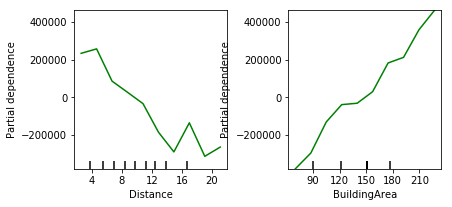

In [8]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

X, y = get_some_data()

my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model, features=[0, 2], # 需要显示的列号
                                   X=X, # 原始预测因子数据
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # 图标签
                                   grid_resolution=10) # 绘图中x轴值数量